In [1]:
import numpy as np
import pandas as pd
import random
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

%matplotlib inline

In [2]:
ds = pd.read_csv('dataset_FLD.csv', header=None)
X = ds[[0,1,2]]
y = ds[3]
# no_classes = len(np.unique(y))  
# no_features = np.size(X, axis=1)

In [3]:
class LDA():
    
    def __init__(self):
        self.w = None
        self.threshold = None
        self.less_class = None
        self.more_class = None
        self.X_transformed0 = None
        self.X_transformed1 = None
    
    def fit(self, X, y):
        
        X0 = X[y == 0]
        X1 = X[y == 1]
        
        mean0 = X0.mean(axis=0)
        mean1 = X1.mean(axis=0)
        diff_means = mean0 - mean1
        
        N = np.shape(X)[0]
        
        sw0 = np.array((1 / N) * (X0 - X0.mean(axis=0)).T.dot(X0 - X0.mean(axis=0)))
        sw1 = np.array((1 / N) * (X1 - X1.mean(axis=0)).T.dot(X1 - X1.mean(axis=0)))
        sw = sw0 + sw1
        
        self.w = np.linalg.pinv(sw).dot(diff_means) 
        
    def fit_transform(self, X, y):
        self.fit(X, y)
        X_transform = self.transform(X, y)
        return X_transform
    
    def transform(self, X, y):
        # Project data onto vector
        X_transform = X.dot(self.w)
        return X_transform

    def fit_normal_dist(self, X, y):
        self.X_transformed0 = X_transformed[y == 0]
        self.X_transformed1 = X_transformed[y == 1]

        mean_transformed0 = self.X_transformed0.mean(axis=0)
        mean_transformed1 = self.X_transformed1.mean(axis=0)

        std_transformed0 = self.X_transformed0.std()
        std_transformed1 = self.X_transformed1.std()

        variation_transformed0 = std_transformed0 ** 2
        variation_transformed1 = std_transformed1 ** 2

        a = 0.5 * ((1/variation_transformed0) - (1/variation_transformed1))

        b = ((mean_transformed0/variation_transformed0) - (mean_transformed1/variation_transformed1))

        c = (0.5 * (((mean_transformed0 ** 2) / variation_transformed0) - ((mean_transformed1 ** 2) / variation_transformed1))) + np.log(std_transformed0 / std_transformed1)


        D2 = (b ** 2) - (4 * a * c)

        D = math.sqrt(D2)

        root1 = ((-b) + D) / (2 * a)
        root2 = ((-b) - D) / (2 * a)

        # print(f'root1 - \n', root1)
        # print(f'root2 - \n', root2)   

        if((root1 > mean_transformed1 and root1 < mean_transformed0) or (root1 > mean_transformed0 and root1 < mean_transformed1)):
            self.threshold = root1
        elif((root2 > mean_transformed1 and root2 < mean_transformed0) or (root2 > mean_transformed0 and root2 < mean_transformed1)):
            self.threshold = root2

        if((mean_transformed0 <= self.threshold) and (mean_transformed1 >= self.threshold)):
            less_class = 0
            more_class = 1
        if((mean_transformed1 <= self.threshold) and (mean_transformed0 >= self.threshold)):
            less_class = 1
            more_class = 0



In [4]:
l = LDA()
X_transformed = l.fit_transform(X, y)
l.fit_normal_dist(X_transformed, y)

In [5]:
# np.sort(X_transformed1)

In [6]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# lda = LDA(n_components=1)
# lda.fit_transform(X, y)
# X = lda.transform(X)

In [7]:
print(f'The discriminant vector in 1-D is - {l.threshold} a single point.') # this is the discriminant vector(a single point) in 1-D

The discriminant vector in 1-D is - -8.812647597643263 a single point.


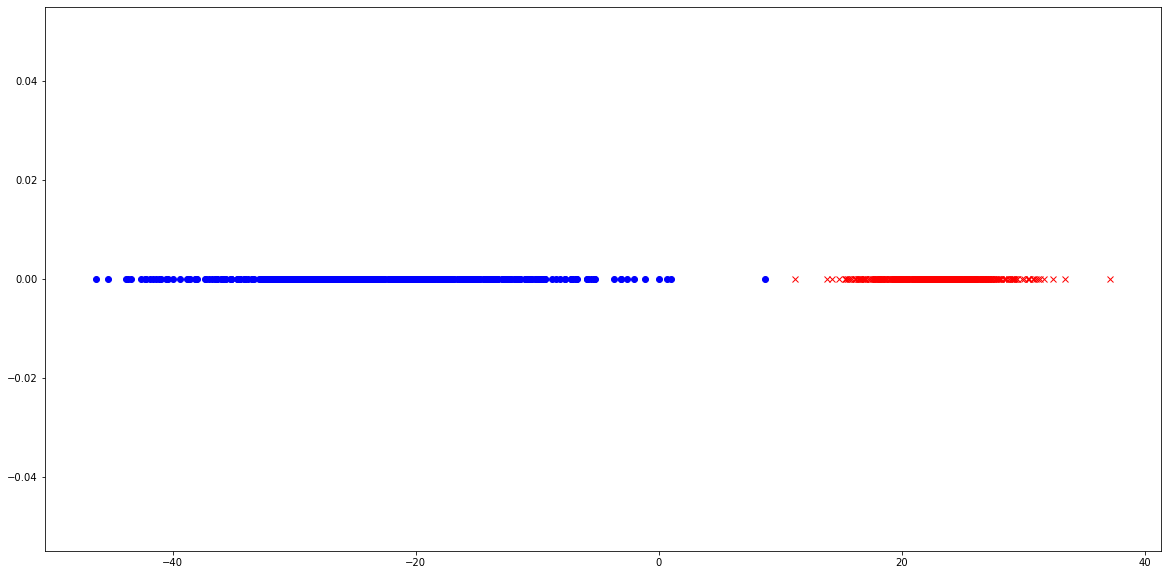

In [8]:
fig = plt.figure(figsize=(20, 10))
# ax3D=fig.add_subplot(121, projection='3d')
# collection = ax3D.scatter(X[0], X[1], X[2], c=y, vmin=min(y), vmax=max(y),marker='o', cmap=cm.Spectral)

# ax3D.view_init(5, 130)
# plt.colorbar(collection)

val = 0
plt.plot(l.X_transformed0, np.zeros_like(l.X_transformed0) + val, 'x', color='red')
val = 0
plt.plot(l.X_transformed1, np.zeros_like(l.X_transformed1) + val, 'o', color='blue')